In [1]:
import pandas as pd

In [2]:
wage_prod = pd.read_csv('../Desktop/wage_prod.csv', sep = '\t')
# https://fred.stlouisfed.org/series/LES1252881600Q
# https://www.epi.org/productivity-pay-gap/
wage_prod['year'] = pd.to_datetime(wage_prod['year'], format='%Y') 
wage_prod['comp'] = pd.to_numeric(wage_prod['comp']) 
wage_prod['prod'] = pd.to_numeric(wage_prod['prod']) 

wage_prod.set_index(wage_prod['year'], inplace = True)

In [3]:
wage_prod.dtypes

year    datetime64[ns]
comp           float64
prod           float64
dtype: object

In [4]:
wage_prod.iloc[10:30,:]

,year,comp,prod
year,,,
1958-01-01,1958-01-01,38.16,32.78
1959-01-01,1959-01-01,42.55,37.64
1960-01-01,1960-01-01,45.50,40.05
1961-01-01,1961-01-01,47.99,44.36
1962-01-01,1962-01-01,52.48,49.79
1963-01-01,1963-01-01,55.03,55.01
1964-01-01,1964-01-01,58.51,59.99
1965-01-01,1965-01-01,62.47,64.94
1966-01-01,1966-01-01,64.90,70.00


In [5]:
# most recent compensation
wage_prod[wage_prod.index == wage_prod.index.max()]
# most recent prod

,year,comp,prod
year,,,
2016-01-01,2016-01-01,115.14,241.76


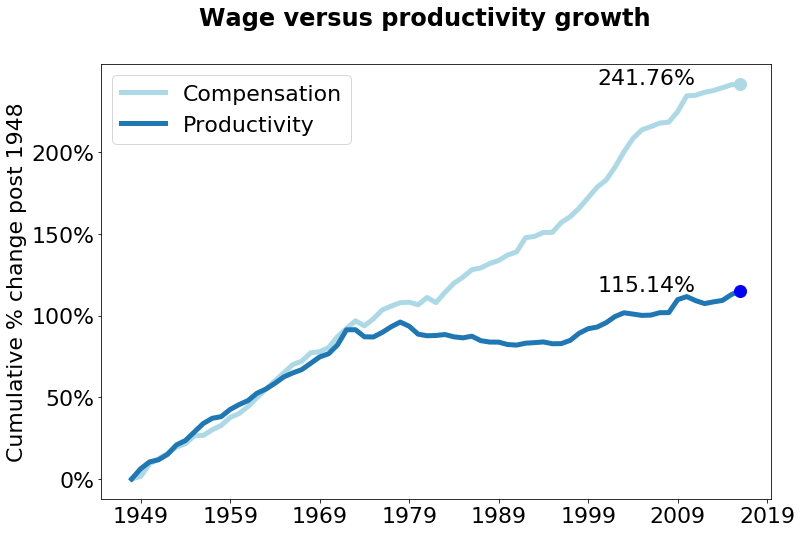

In [15]:
import matplotlib.pyplot as plt
# fig.set_size_inches(8, 10, forward = True)

fig = plt.figure()
fig.set_size_inches(12, 8, forward = True)

ax2 = fig.add_subplot(111)


plt.rcParams.update({'font.size': 22})
# fig = plt.figure()
fig.suptitle('Wage versus productivity growth', fontsize=24, fontweight='bold')

plt.plot(wage_prod['prod'], linewidth =5, color = 'lightblue')
plt.plot(wage_prod['comp'], linewidth =5)
plt.legend(['Compensation', 'Productivity'], loc='upper left')
ax2.set_ylabel('Cumulative % change post 1948')
ax2.plot(wage_prod[wage_prod.index == wage_prod.index.max()].index, wage_prod[wage_prod.index == wage_prod.index.max()]['comp'],'o',color='blue', markersize=12)
ax2.text('2000-01-01', wage_prod[wage_prod.index == wage_prod.index.max()]['comp'], str(wage_prod[wage_prod.index == wage_prod.index.max()]['comp'][0])+'%')

ax2.plot(wage_prod[wage_prod.index == wage_prod.index.max()].index, wage_prod[wage_prod.index == wage_prod.index.max()]['prod'], 'o', color = 'lightblue', markersize=12)
ax2.text('2000-01-01', wage_prod[wage_prod.index == wage_prod.index.max()]['prod'], str(wage_prod[wage_prod.index == wage_prod.index.max()]['prod'][0])+'%')
plt.yticks( [0,50,100,150,200], ('0%', '50%','100%','150%', '200%' ))

# for label in ax2.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False)

# ax2.xaxis_date()
# fig.autofmt_xdate()
# ax2.set_xlabel('Year')
# plt.tight_layout()
plt.show()
fig.savefig('wage_prod.png', dpi=1000)